## Tema 1: Introducción
### Resumen
En este notebook vamos a ver como definir una neurona y comandos básicos de tensorflow.
Primero deberemos crear un env (preferiblemente con conda)

Importamos los paquetes necesarios en nuestro environment

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import layers, Input, regularizers
from keras.models import Model
import tensorflow as tf
from sklearn.model_selection import train_test_split

AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

### Creamos una neurona

In [13]:
# Definimos la dimensión del input, shape que es un vector que tiene un solo elemento, para imagenes hay que añadir con color sería , 3 y si es blanco y negro no pones nada
input = Input(shape=(1,))

# Creamos la neurona, units=1, significa que en una capa hay una neurona
output = layers.Dense(units=1, activation='sigmoid')(input)

# creamos el modelo, en este paso hace la conexión de los inputs con los outputs
neurona = Model(inputs=input, outputs=output, name='neurona')
print(neurona.summary())

NameError: name 'Input' is not defined

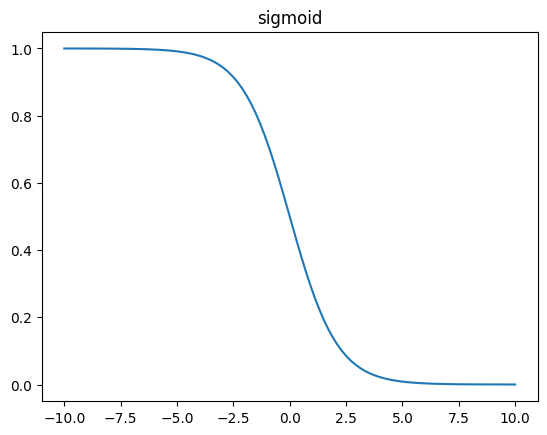

In [3]:
# Ploteamos la neurona
x = np.linspace(-10,10,100) #es la fila x, son 100 elementos
y = neurona(x)
plt.figure()
plt.title('sigmoid')
plt.plot(x,y)
plt.show()

En tensorflow podemos definir constantes y variables. Aunque podemos trabajar en el nivel del modelo.

In [4]:
# el tensorflow no lo vamos ahacer
a = tf.constant(5)
print(a)

tf.Tensor(5, shape=(), dtype=int32)


In [5]:
x = tf.Variable(9)
print(x)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=9>


### Regresión Lineal

Creamos un dataset sintético

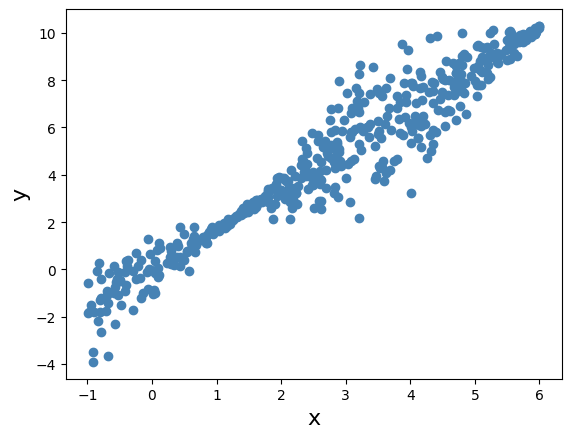

In [6]:
# Definimos la varianza de los datos por tramos, linea de regresion minimice los MSE, es una neurona (una recta)
#Esto es un dataset sintético
x1 = np.arange(1, 12, 0.1)
x1 = x1[::-1]
x2 = np.repeat(1, 30)
x3 = np.arange(1, 15, 0.1)
x4 = np.repeat(15, 50)
x5 = x3[::-1]
x6 = np.repeat(1, 20)
x = np.concatenate([x1, x2, x3, x4, x5, x6])


# Generamos los datos con la varianza que hemos definido
np.random.seed(4710)
noise = np.random.normal(0, x, len(x))
np.random.seed(99)
first_part = len(x1)
x11 = np.random.uniform(-1, 1, first_part)
np.random.seed(97)
x12 = np.random.uniform(1, 6, len(noise) - first_part)
x = np.concatenate([x11, x12])
x = np.sort(x)

# Añadimos ruido a los datos
y = 1.7 * x + noise / 10 #la pendiente es 1,7
y = y.reshape((len(y), 1))
x = x.reshape((len(x), 1))

# visualizamos
plt.figure()
plt.scatter(x, y, color="steelblue")
plt.xlabel("x", size=16)
plt.ylabel("y", size=16)  #pred
plt.show()

nr of traning samples =  293
nr of validation samples =  74
nr of test samples =  123


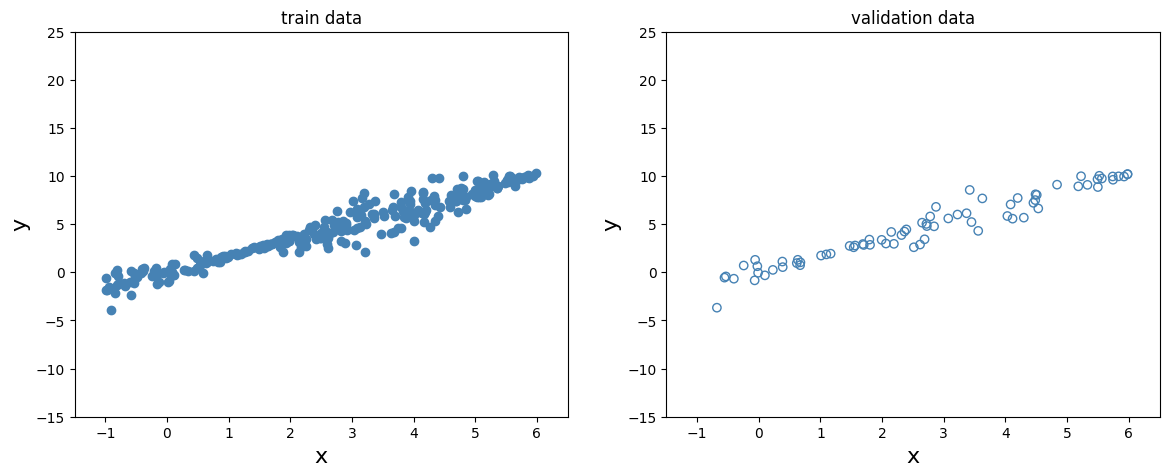

In [7]:
# Creamos el dataset sintético (datos para entrenar y testear)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=47)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=22)

print("nr of traning samples = ", len(x_train))
print("nr of validation samples = ", len(x_val))
print("nr of test samples = ", len(x_test))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, color="steelblue")
plt.xlabel("x", size=16)
plt.ylabel("y", size=16)
plt.title("train data")
plt.xlim([-1.5, 6.5])
plt.ylim([-15, 25])
plt.subplot(1, 2, 2)
plt.scatter(x_val, y_val, facecolors='none', edgecolors="steelblue")
plt.xlabel("x", size=16)
plt.ylabel("y", size=16)
plt.title("validation data")
plt.xlim([-1.5, 6.5])
plt.ylim([-15, 25])
plt.show()

In [8]:
inputs = Input(shape=(1,))
out = layers.Dense(1)(inputs)

deterministic_model = Model(inputs=inputs, outputs=out)
deterministic_model.compile('Adam', loss='mse')
history = deterministic_model.fit(x_train, y_train, epochs=500, batch_size=30, validation_data=(x_val, y_val))

Epoch 1/500
10/10 [==============================] - ETA: 0s - loss: 36.6227

2023-10-11 12:59:48.971820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-11 12:59:49.168122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 16ms/step - loss: 36.6227 - val_loss: 36.1766
Epoch 2/500
10/10 [==============================] - 0s 7ms/step - loss: 36.1302 - val_loss: 35.6936
Epoch 3/500
10/10 [==============================] - 0s 6ms/step - loss: 35.6280 - val_loss: 35.2177
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 35.1482 - val_loss: 34.7385
Epoch 5/500
10/10 [==============================] - 0s 6ms/step - loss: 34.6517 - val_loss: 34.2720
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 34.1851 - val_loss: 33.7973
Epoch 7/500
10/10 [==============================] - 0s 6ms/step - loss: 33.6959 - val_loss: 33.3383
Epoch 8/500
10/10 [==============================] - 0s 6ms/step - loss: 33.2331 - val_loss: 32.8768
Epoch 9/500
10/10 [==============================] - 0s 6ms/step - loss: 32.7621 - val_loss: 32.4231
Epoch 10/500
10/10 [==============================] - 0s 6ms/step - loss: 32.3009 - val_loss: 31.9751


Mostramos el modelo de regresión lineal

10/10 [==============================] - 0s 2ms/step


2023-10-11 13:00:21.721394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


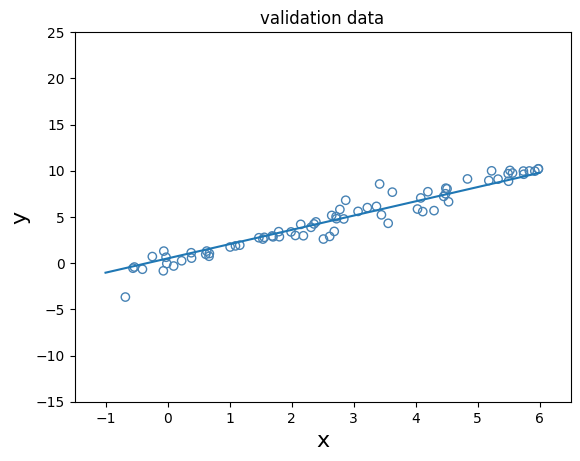

In [9]:
x_test = np.linspace(-1, 6, 300)
y_pred = deterministic_model.predict(x_test)

plt.figure()
plt.scatter(x_val, y_val, facecolors='none', edgecolors="steelblue")
plt.xlabel("x", size=16)
plt.ylabel("y", size=16)
plt.title("validation data")
plt.xlim([-1.5, 6.5])
plt.ylim([-15, 25])

plt.plot(x_test, y_pred)
plt.show()

### Ejercicio
Modificar el error en el dataset y ver como varía el modelo y el error